# Differencial equations

## Numerical integration

This part cover the chapter 1.8 page 36 to 52 of the book "Orbital mechanics for Engineering Students" (ISBN: 978-0-08-097747-a)

In the book the presented example is a system with a masse, a string and a damper. 

The equation of the model is the following:
$$ \ddot{x} + 2\zeta \omega_n\dot{x} + \omega_n^2 x = \frac{F(t)}{m} $$
$F(t)$ is a sinusoidal force of an amplitufe of $F_0$ and a circular frequency of $\omega$.

The solution of this differential equation is:
$$ x = e^{-\zeta \omega_n t} (A\sin{\omega_d t}+ B\cos{\omega_d t})
    + \frac{F_0/m}{(\omega_n^2 - \omega^2)^2 + (2\omega \omega_n \zeta)^2}
    [(\omega_n^2 - \omega^2)\sin{\omega t} - 2 \omega \omega_n \zeta \cos{\omega t}]$$
With
$$ A = \zeta \frac{\omega_n}{\omega_d} x_0 + \frac{\dot{x}_0}{\omega_d}
    + \frac{\omega^2 + (2\zeta^2 - 1)\omega_n^2}
           {(\omega_n^2 - \omega^2)^2 + (2\omega\omega_n \zeta)^2}
    \frac{\omega}{\omega_d}
    \frac{F_0}{m}$$
and
$$ B = x_0 + \frac{2 \omega \omega_n \zeta}{(\omega_n^2 - \omega^2)^2 + (2 \omega \omega_n \zeta)^2}
        \frac{F_0}{m}$$
with $ \omega_d = \omega_n \sqrt{1-\zeta^2}$

### Example

Example for t=0 to t=110

$ m = 1 kg$

$\omega_n = 1 rad/s $

$\zeta = 0.03 $

$F_0 = 1N $

$\omega = 0.4 rad/s $

and for initial condition $x = \dot{x} =0 $

Representation with Python

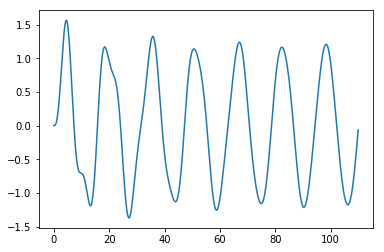

In [255]:
import numpy as np
import math
import matplotlib.pyplot as plt

def general_x(t, x_0, xdot_0,  m, zeta, omega_n, omega, F_0):
    omega_d = omega_n * math.sqrt(1-zeta**2)
    
    A = zeta*(omega_n/omega_d)*x_0 + xdot_0 / omega_d \
    + (omega**2 + (2*zeta**2 - 1)*omega_n**2) / (((omega_n**2 - omega**2)**2 + (2*omega*omega_n*zeta)**2)) \
    * (omega / omega_d) * (F_0 / m)
    
    B = x_0 + ((2*omega*omega_n*zeta) / (((omega_n**2 - omega**2)**2 + (2*omega*omega_n*zeta)**2))) * (F_0 / m)
    
    y = math.exp(-zeta * omega_n * t)*(A*math.sin(omega_d*t) + B*math.cos(omega_d*t)) \
        + ((F_0 / m)/((omega_n**2 - omega**2)**2 + (2*omega*omega_n*zeta)**2)) \
        * ((omega_n**2 - omega**2) * math.sin(omega*t) - (2*omega*omega_n*zeta*math.cos(omega*t)))
    return y

def x(t=0):
    x_0 = 0
    xdot_0 = 0
    m = 1
    zeta = 0.03
    omega = 0.4
    omega_n = 1
    F_0 = 1
    
    return general_x(t, x_0, xdot_0,  m, zeta, omega_n, omega, F_0)

t0 = 0.0
t_end = 110.0
step = 0.1

y_exact = []

t = np.arange(t0, t_end, step)

for i in t:
    y_exact.append(x(i))

plt.plot(t, y_exact)
plt.show()

## Runge-Kutta Algorithm

Please refere to page 41 for the details.

In [232]:
def rk1_4(ode_function, tspan, y0, h, rk):
    '''Runge_Kutta numerical integration algorithm
    
    Parameters:
        ode_function: derivate of f
        tspan: vector [t0, tf] giving the time interval for the solution
        y0: column vector of the initial value of y
        h: time step
        rk: rank from 1 to 4 (RK1 Euler's method, RK2 Heun's method, RK3, RK4)'''
    
    if rk == 1:
        n_stage = 1
        a = np.array((0,))
        b = np.array((0,))
        c = np.array((1,))
    elif rk == 2:
        n_stage = 2
        a = np.array( (0, 1.0) )
        b = np.array( ((0, 1.0), \
                       (0, 0)) ) 
        c = np.array( (1/2.0, 1/2.0) )
    elif rk == 3:
        n_stage = 3
        a = np.array( (0, 1/2.0, 1) )
        b = np.array( ((0, 0), \
            (1/2.0, 0), \
            (-1.0, 2.0)) )
        c = np.array( (1/6.0, 2/3.0, 1/6.0) )
    elif rk == 4:
        n_stage = 4
        a = np.array( (0, 1/2.0, 1/2.0, 1) )
        b = np.array( ((0, 0, 0), \
            (1/2.0, 0, 0), \
            (0, 1/2.0, 0), \
            (0, 0, 1.0)) )
        c = np.array( (1/6.0, 1/3.0, 1/3.0, 1/6.0))
    else:
        raise ValueError('The rank must be 1 ,2 ,3 or 4.')
    
    t0 = tspan[0]
    tf = tspan[1]
    t = t0
    y = y0
    tout = [t]
    yout = [[y]]
    
    f = []
    
    while t < tf:
        ti = t
        yi = y
        for i in range(1, n_stage+1):
            t_inner = ti + a[i-1]*h
            y_inner = yi
            for j in range(1, i):
                y_inner = y_inner + np.dot(h*b[i-1][j-1], f[j-1])
            f.append(ode_function(t_inner, y_inner))
 
            
        fmat = np.array(f).reshape(2, len(f))
        yimat = np.array(yi).reshape(2,1)
        h = min(h, tf - t)
        t = t + h
        y = yimat + h * np.dot(fmat, c.reshape(len(c), 1))
        tout.append(t)
        yout.append(y.reshape(1,2))
        f = []
    
    return tout, yout

In [259]:
def rates(t, f):
    x = f[0]
    Dx = f[1]
    
    m = 1
    z = 0.03
    wn = 1
    Fo = 1
    w = 0.4*wn
    
    D2x = Fo/m*math.sin(w*t) - 2*z*wn*Dx - x*wn**2
    
    #print("x = ", x, " Dx = ", Dx, " D2x = ", D2x)
    
    return Dx, D2x

sol = rk1_4(rates, [0, 110], [0, 0], 0.1, 4)

In [260]:
len(sol[1][:-1])

1101

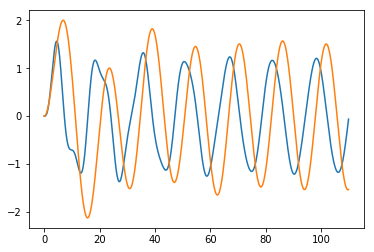

In [261]:
t = sol[0][:-2]
y = []
for i in sol[1][:-2]:
    y.append(i[0][0])

plt.plot(t, y_exact)
plt.plot(t, y)
plt.show()

In [212]:
c = np.array( (1/6.0, 1/3.0, 1/3.0, 1/6.0))